In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [3]:

dataset = pd.read_csv(r"C:\Users\bonas\Downloads\CO2 emissions_my own\co2_emissions_my_own.csv")
dataset = pd.DataFrame(dataset)
dataset.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

In [4]:
# Shape of dataset
dataset.shape

(6965, 31)

The dataset consist of 31 columns, which means 30 predictors plus target variable

In [5]:
# Copy of original dataset
df = dataset.copy()

# EDA


In [30]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^0-9a-zA-Z_]', '', regex=True)
df.head()

Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice_Cultivation  Drained_organic_soils_CO2  Pesticides_Manufacturing  \
0            686.00                        0.0                 11.807483   
1            678.16                        0.0                 11.712073   
2            686.00                        0.0                 11.712073   
3            686.00                        0.0                 11.712073   
4            705.60                        0.0                 11.712073   

   Food_Transport  Forestland  ...  Manure_Management  Fires_in_organic_soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires_in_humid_tropical_forests  Onfarm_energy_use  Rural_population  \
0                              0.0        3008.982252         9655167.0   
1                              0.0        3008.982252        10230490.0   
2                              0.0        3008.982252        10995568.0   
3                              0.0        3008.982252        11858090.0   
4                              0.0        3008.982252        12690115.0   

   Urban_population  Total_Population__Male  Total_Population__Female  \
0         2593947.0               5348387.0                 5346409.0   
1         2763167.0               5372959.0                 5372208.0   
2         2985663.0               6028494.0                 6028939.0   
3         3237009.0               7003641.0                 7000119.0   
4         3482604.0               7733458.0                 7722096.0   

   total_emission  Average_Temperature_C  
0     2198.963539               0.536167  
1     2323.876629               0.020667  
2     2356.304229              -0.259583  
3     2368.470529               0.101917  
4     2500.768729               0.372250  

[5 rows x 31 columns]

Copy is convinient to make changes to without losing orinal data


In [6]:
df.describe().T

count          mean           std  \
Year                             6965.0  2.005125e+03  8.894665e+00   
Savanna fires                    6934.0  1.188391e+03  5.246288e+03   
Forest fires                     6872.0  9.193022e+02  3.720079e+03   
Crop Residues                    5576.0  9.987063e+02  3.700345e+03   
Rice Cultivation                 6965.0  4.259667e+03  1.761383e+04   
Drained organic soils (CO2)      6965.0  3.503229e+03  1.586145e+04   
Pesticides Manufacturing         6965.0  3.334184e+02  1.429159e+03   
Food Transport                   6965.0  1.939582e+03  5.616749e+03   
Forestland                       6472.0 -1.782829e+04  8.183221e+04   
Net Forest conversion            6472.0  1.760564e+04  1.011575e+05   
Food Household Consumption       6492.0  4.847580e+03  2.578914e+04   
Food Retail                      6965.0  2.043211e+03  8.494249e+03   
On-farm Electricity Use          6965.0  1.626681e+03  9.343182e+03   
Food Packaging                   6965.0  1.658630e+03  1.148134e+04   
Agrifood Systems Waste Disposal  6965.0  6.018445e+03  2.215674e+04   
Food Processing                  6965.0  3.872724e+03  1.983822e+04   
Fertilizers Manufacturing        6965.0  3.035723e+03  1.169303e+04   
IPPU                             6222.0  1.999150e+04  1.114209e+05   
Manure applied to Soils          6037.0  9.232256e+02  3.226992e+03   
Manure left on Pasture           6965.0  3.518027e+03  9.103556e+03   
Manure Management                6037.0  2.263345e+03  7.980542e+03   
Fires in organic soils           6965.0  1.210316e+03  2.266985e+04   
Fires in humid tropical forests  6810.0  6.684529e+02  3.264879e+03   
On-farm energy use               6009.0  3.008982e+03  1.263786e+04   
Rural population                 6965.0  1.785774e+07  8.901521e+07   
Urban population                 6965.0  1.693230e+07  6.574362e+07   
Total Population - Male          6965.0  1.761963e+07  7.603993e+07   
Total Population - Female        6965.0  1.732447e+07  7.251711e+07   
total_emission                   6965.0  6.409124e+04  2.283130e+05   
Average Temperature °C           6965.0  8.729891e-01  5.559295e-01   

                                           min            25%           50%  \
Year                               1990.000000    1997.000000  2.005000e+03   
Savanna fires                         0.000000       0.000000  1.651850e+00   
Forest fires                          0.000000       0.000000  5.179000e-01   
Crop Residues                         0.000200      11.006525  1.036982e+02   
Rice Cultivation                      0.000000     181.260800  5.348174e+02   
Drained organic soils (CO2)           0.000000       0.000000  0.000000e+00   
Pesticides Manufacturing              0.000000       6.000000  1.300000e+01   
Food Transport                        0.000100      27.958600  2.049628e+02   
Forestland                      -797183.079000   -2848.350000 -6.292000e+01   
Net Forest conversion                 0.000000       0.000000  4.444000e+01   
Food Household Consumption            0.000000      11.399950  1.554711e+02   
Food Retail                           0.000000      26.818500  1.720426e+02   
On-farm Electricity Use               0.000000       8.037600  2.912070e+01   
Food Packaging                        0.000000      67.631366  7.401813e+01   
Agrifood Systems Waste Disposal       0.340000      86.680500  9.012757e+02   
Food Processing                       0.000100     209.587728  3.447602e+02   
Fertilizers Manufacturing             0.001900     360.358799  1.115052e+03   
IPPU                                  0.000000      39.031525  8.037066e+02   
Manure applied to Soils               0.049000      16.303000  1.204439e+02   
Manure left on Pasture                0.000700     139.669900  9.725674e+02   
Manure Management                     0.432900      37.632100  2.698563e+02   
Fires in organic soils                0.000000       0.000000  0.000000e+00   
Fires in humid 

In [7]:
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [8]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index(['Savanna fires', 'Forest fires', 'Crop Residues', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'IPPU',
       'Manure applied to Soils', 'Manure Management',
       'Fires in humid tropical forests', 'On-farm energy use'],
      dtype='object')

# Univariate Analysis

  ### Checking for distribution 
  let's plot a histogram of each of the columns with null values to understand the distribution of the data, 
  this will help conclude which measure of tendency to use to fill the null values.

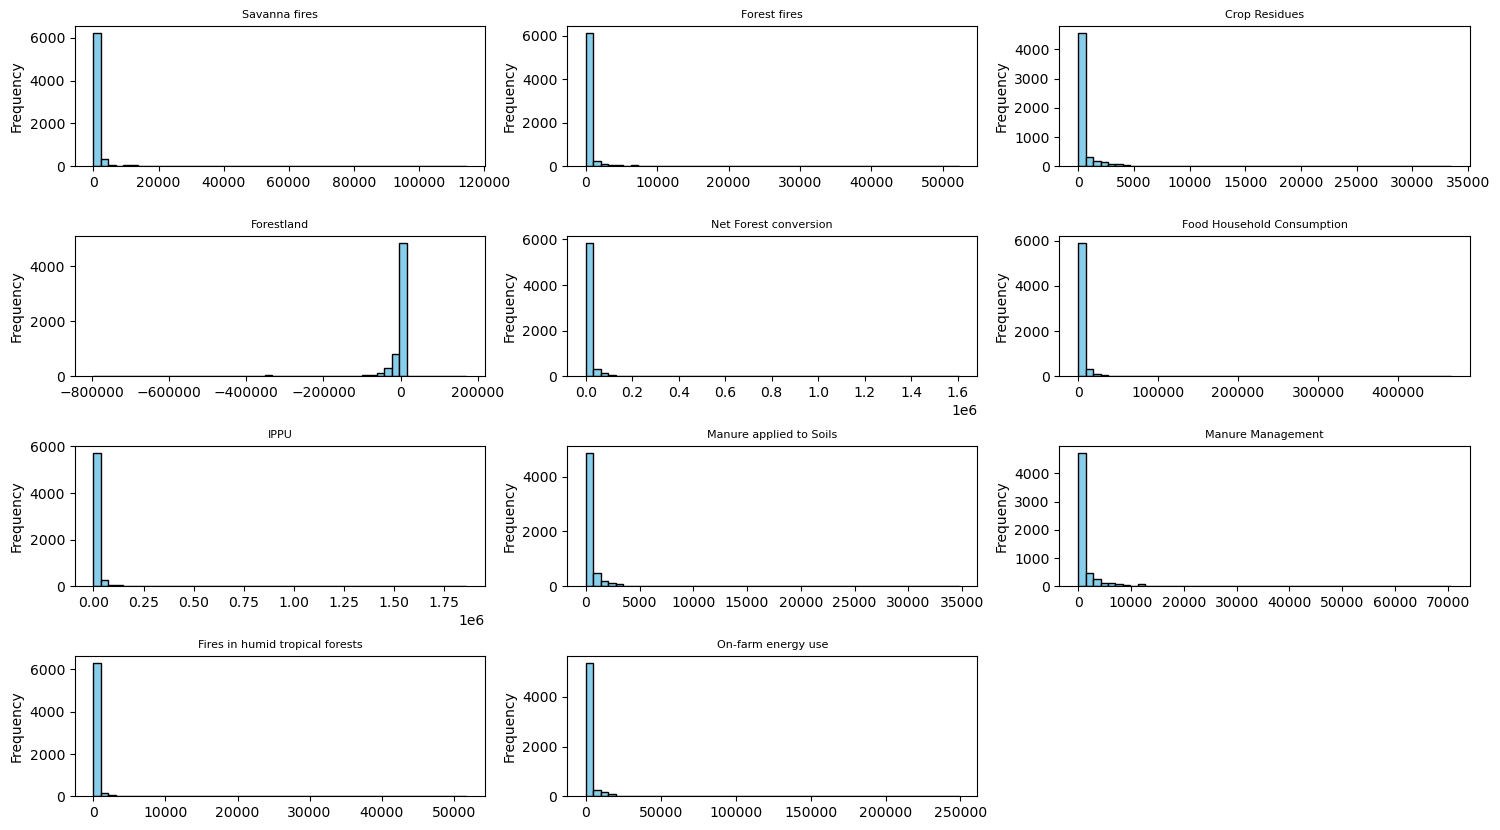

In [9]:
null_data = df.isnull()
fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(hspace = 0.5, wspace=.2)

# Plot histograms for all columns
for i, column in enumerate(columns_with_null, 1):
    plt.subplot(4, 3, i)  # Adjust subplot grid (2 rows, 2 columns for this example)
    plt.hist(df[column], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{column}', fontsize= 8)
    plt.ylabel('Frequency')
    

In [10]:
# fill null values for each column with column mean
for column in columns_with_null:
    df[column].fillna(df[column].mean(), inplace=True)

C:\Users\bonas\AppData\Local\Temp\ipykernel_28212\2076776446.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [11]:
# To check if null values were filled successfully
df.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

# Bivariate analysis

## Checking for linearity

To ensure accurate predictions, we need to assess the linearity between predictor and response variables. This can be done by visualizing scatter plots to identify linear trends. If non-linearity is present, a linear regression model may not be suitable.


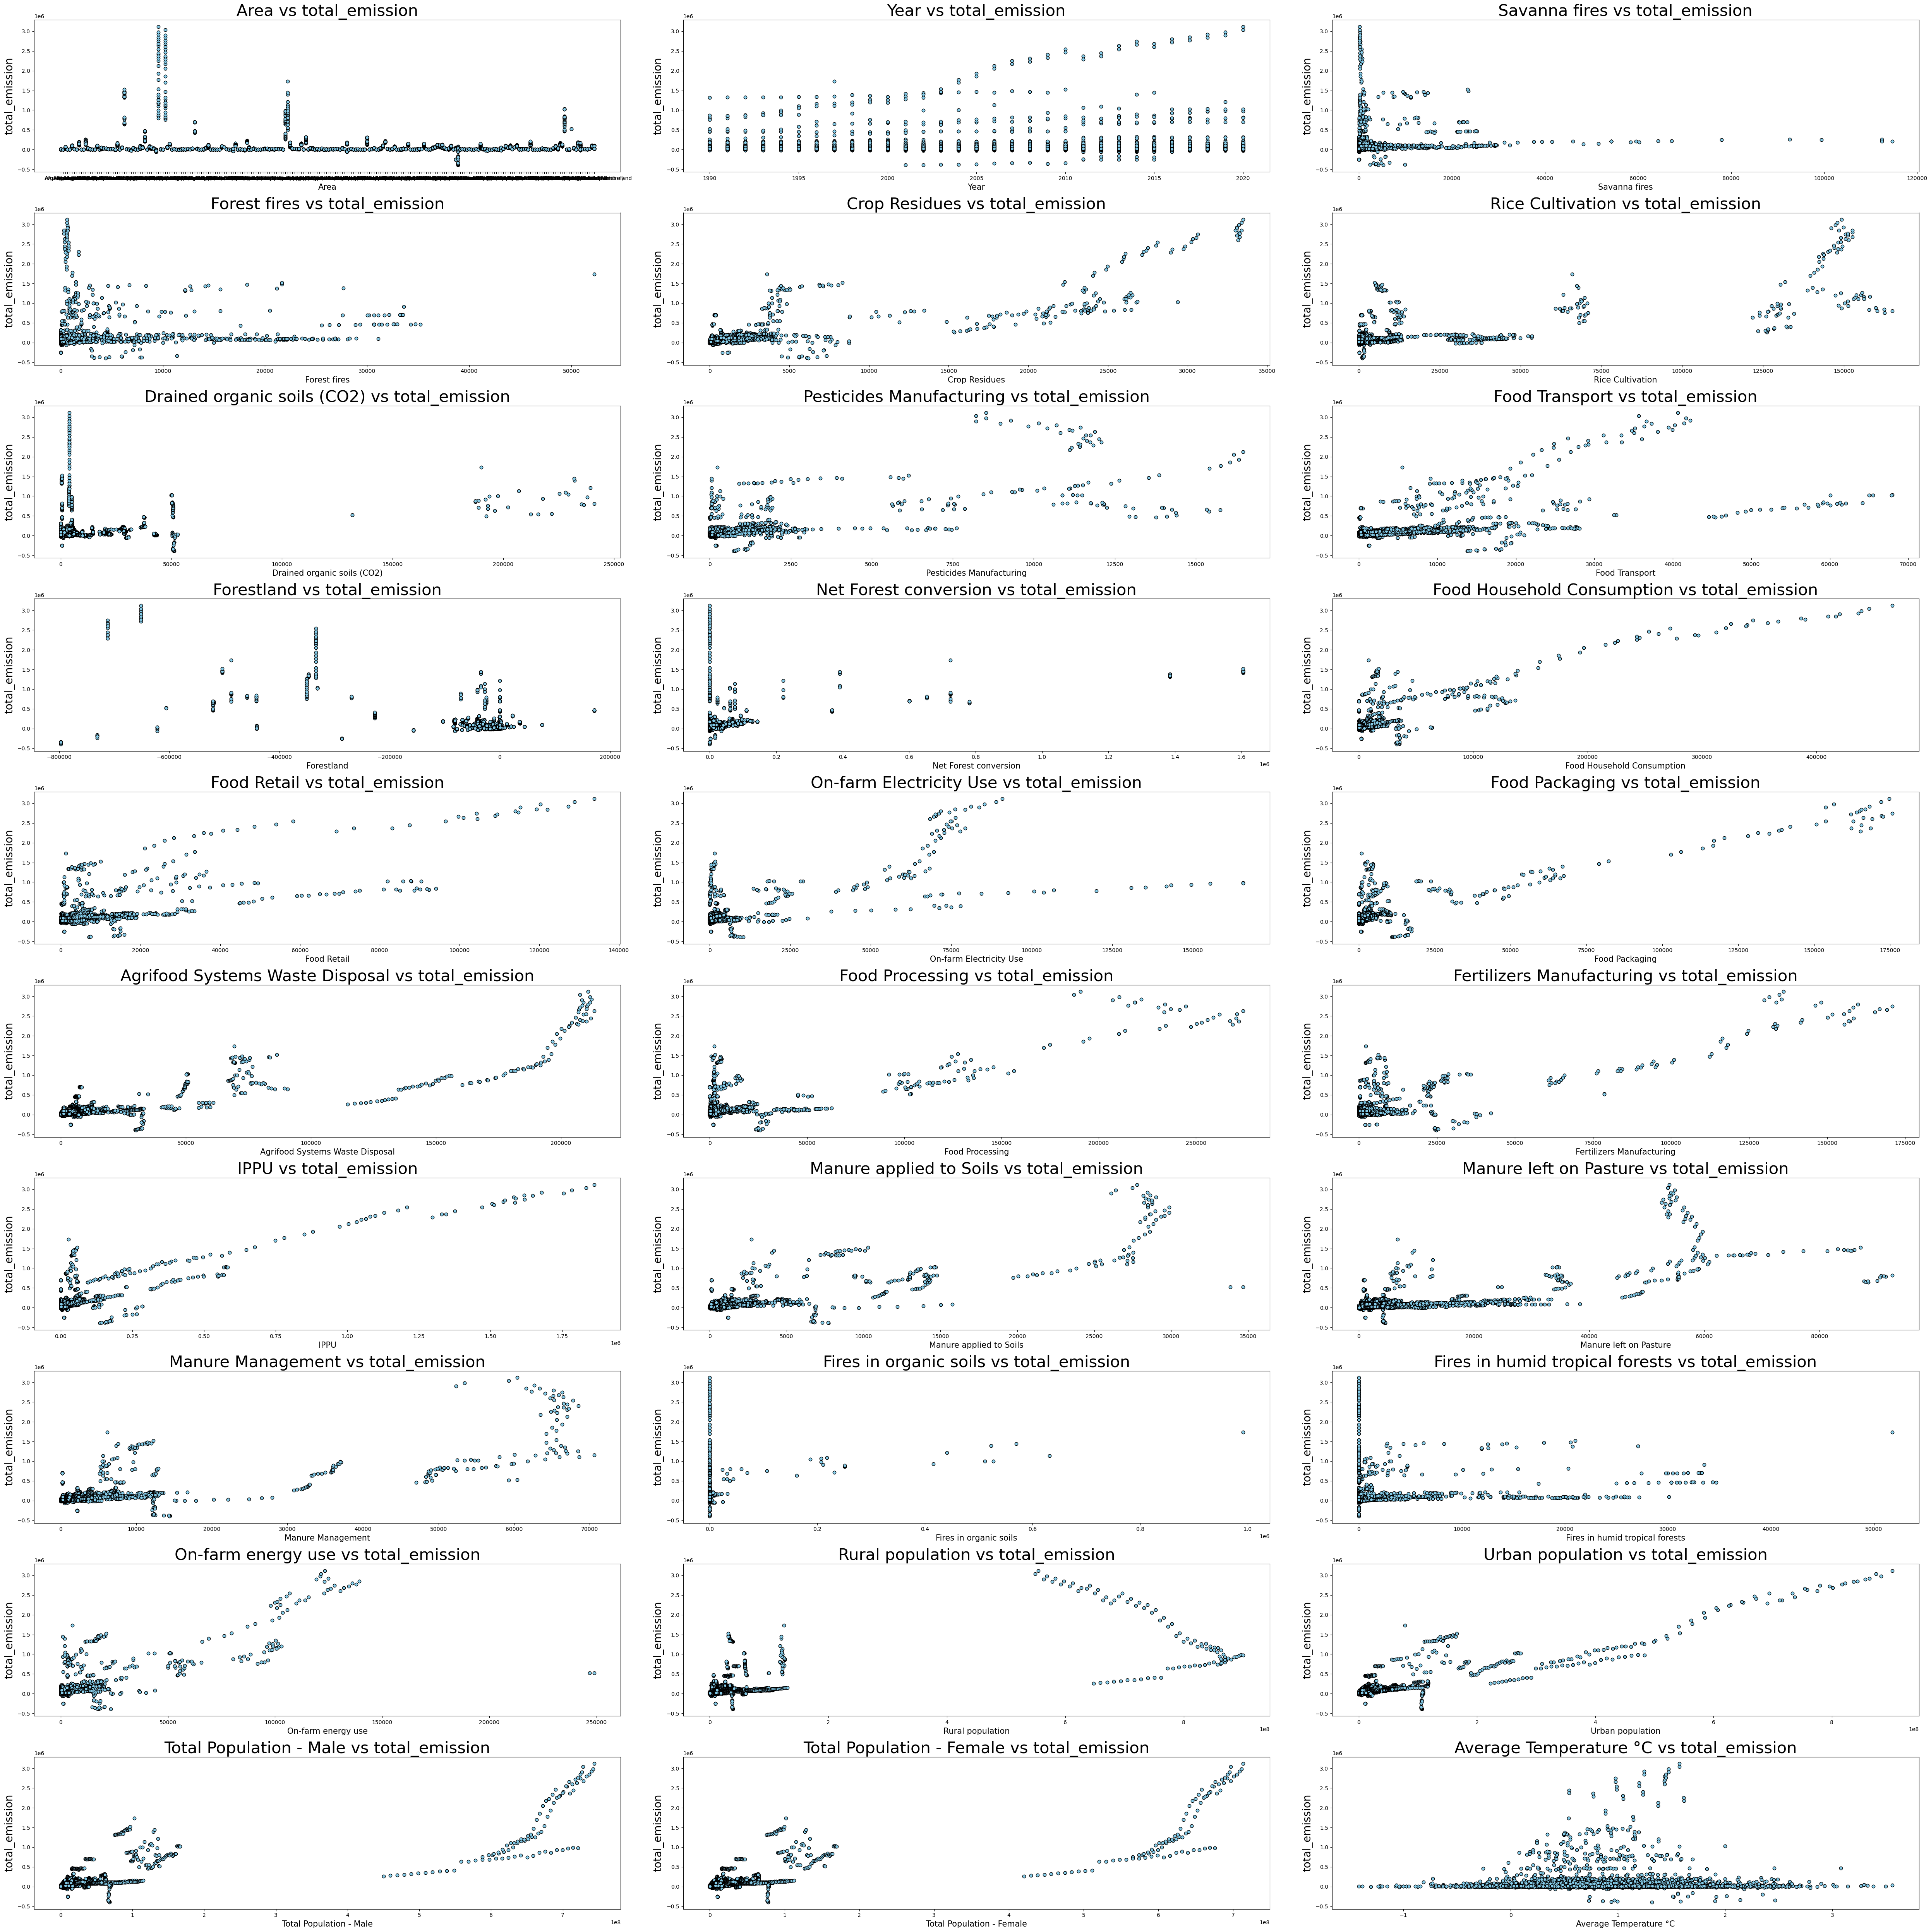

In [ ]:
import math

target = 'total_emission'
features = ['Area', 'Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_organic_soils_CO2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail',
       'Onfarm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
       'Fires_in_humid_tropical_forests', 'Onfarm_energy_use',
       'Rural_population', 'Urban_population', 'Total_Population__Male',
       'Total_Population__Female', 'Average_Temperature_C']
 
n_features = len(features)
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(n_features / n_cols) 

plt.figure(figsize=(50, 5* n_rows))
for i, feature in enumerate(features, start=1):
    plt.subplot(n_rows, n_cols, i)  # Create subplots
    plt.scatter(df[feature], df['total_emission'], color='skyblue', edgecolor='black')
    plt.title(f'{feature} vs {target}', fontsize=30)
    plt.xlabel(feature, fontsize= 15)
    plt.ylabel(target, fontsize= 20)

plt.tight_layout()
plt.show()

# Multivariate analysis

## Checking for multicolinearity

   Multicollinearity occurs when two or more predictor variables in a dataset are strongly correlated. This issue reduces model quality by increasing the standard error of coefficient estimates, making them less precise and leading to wider confidence intervals. Additionally, it complicates estimating the effect of individual predictors on the response variable, as coefficients become sensitive to small changes in the model or data, resulting in instability. 
   
   To test for multicollinearity, we will create paired scatter plots of the predictors and generate a correlation heatmap. These visualizations help identify and assess the strength of correlations among predictors

### Pairwise scatter plot

A pairwise scatter plot matrix creates an n×n grid, where 𝑛 is the number of predictor variables being compared. Each cell in the matrix represents the relationship between two pridictors. Diagonal cells show comparisons of a variable with itself, but instead of scatter plots, they typically display histograms or density plots. These diagonal elements highlight the univariate distribution of each variable, providing insights into the range and distribution of their values.

C:\Users\bonas\AppData\Local\Temp\ipykernel_28212\2589846800.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  g.fig.show()


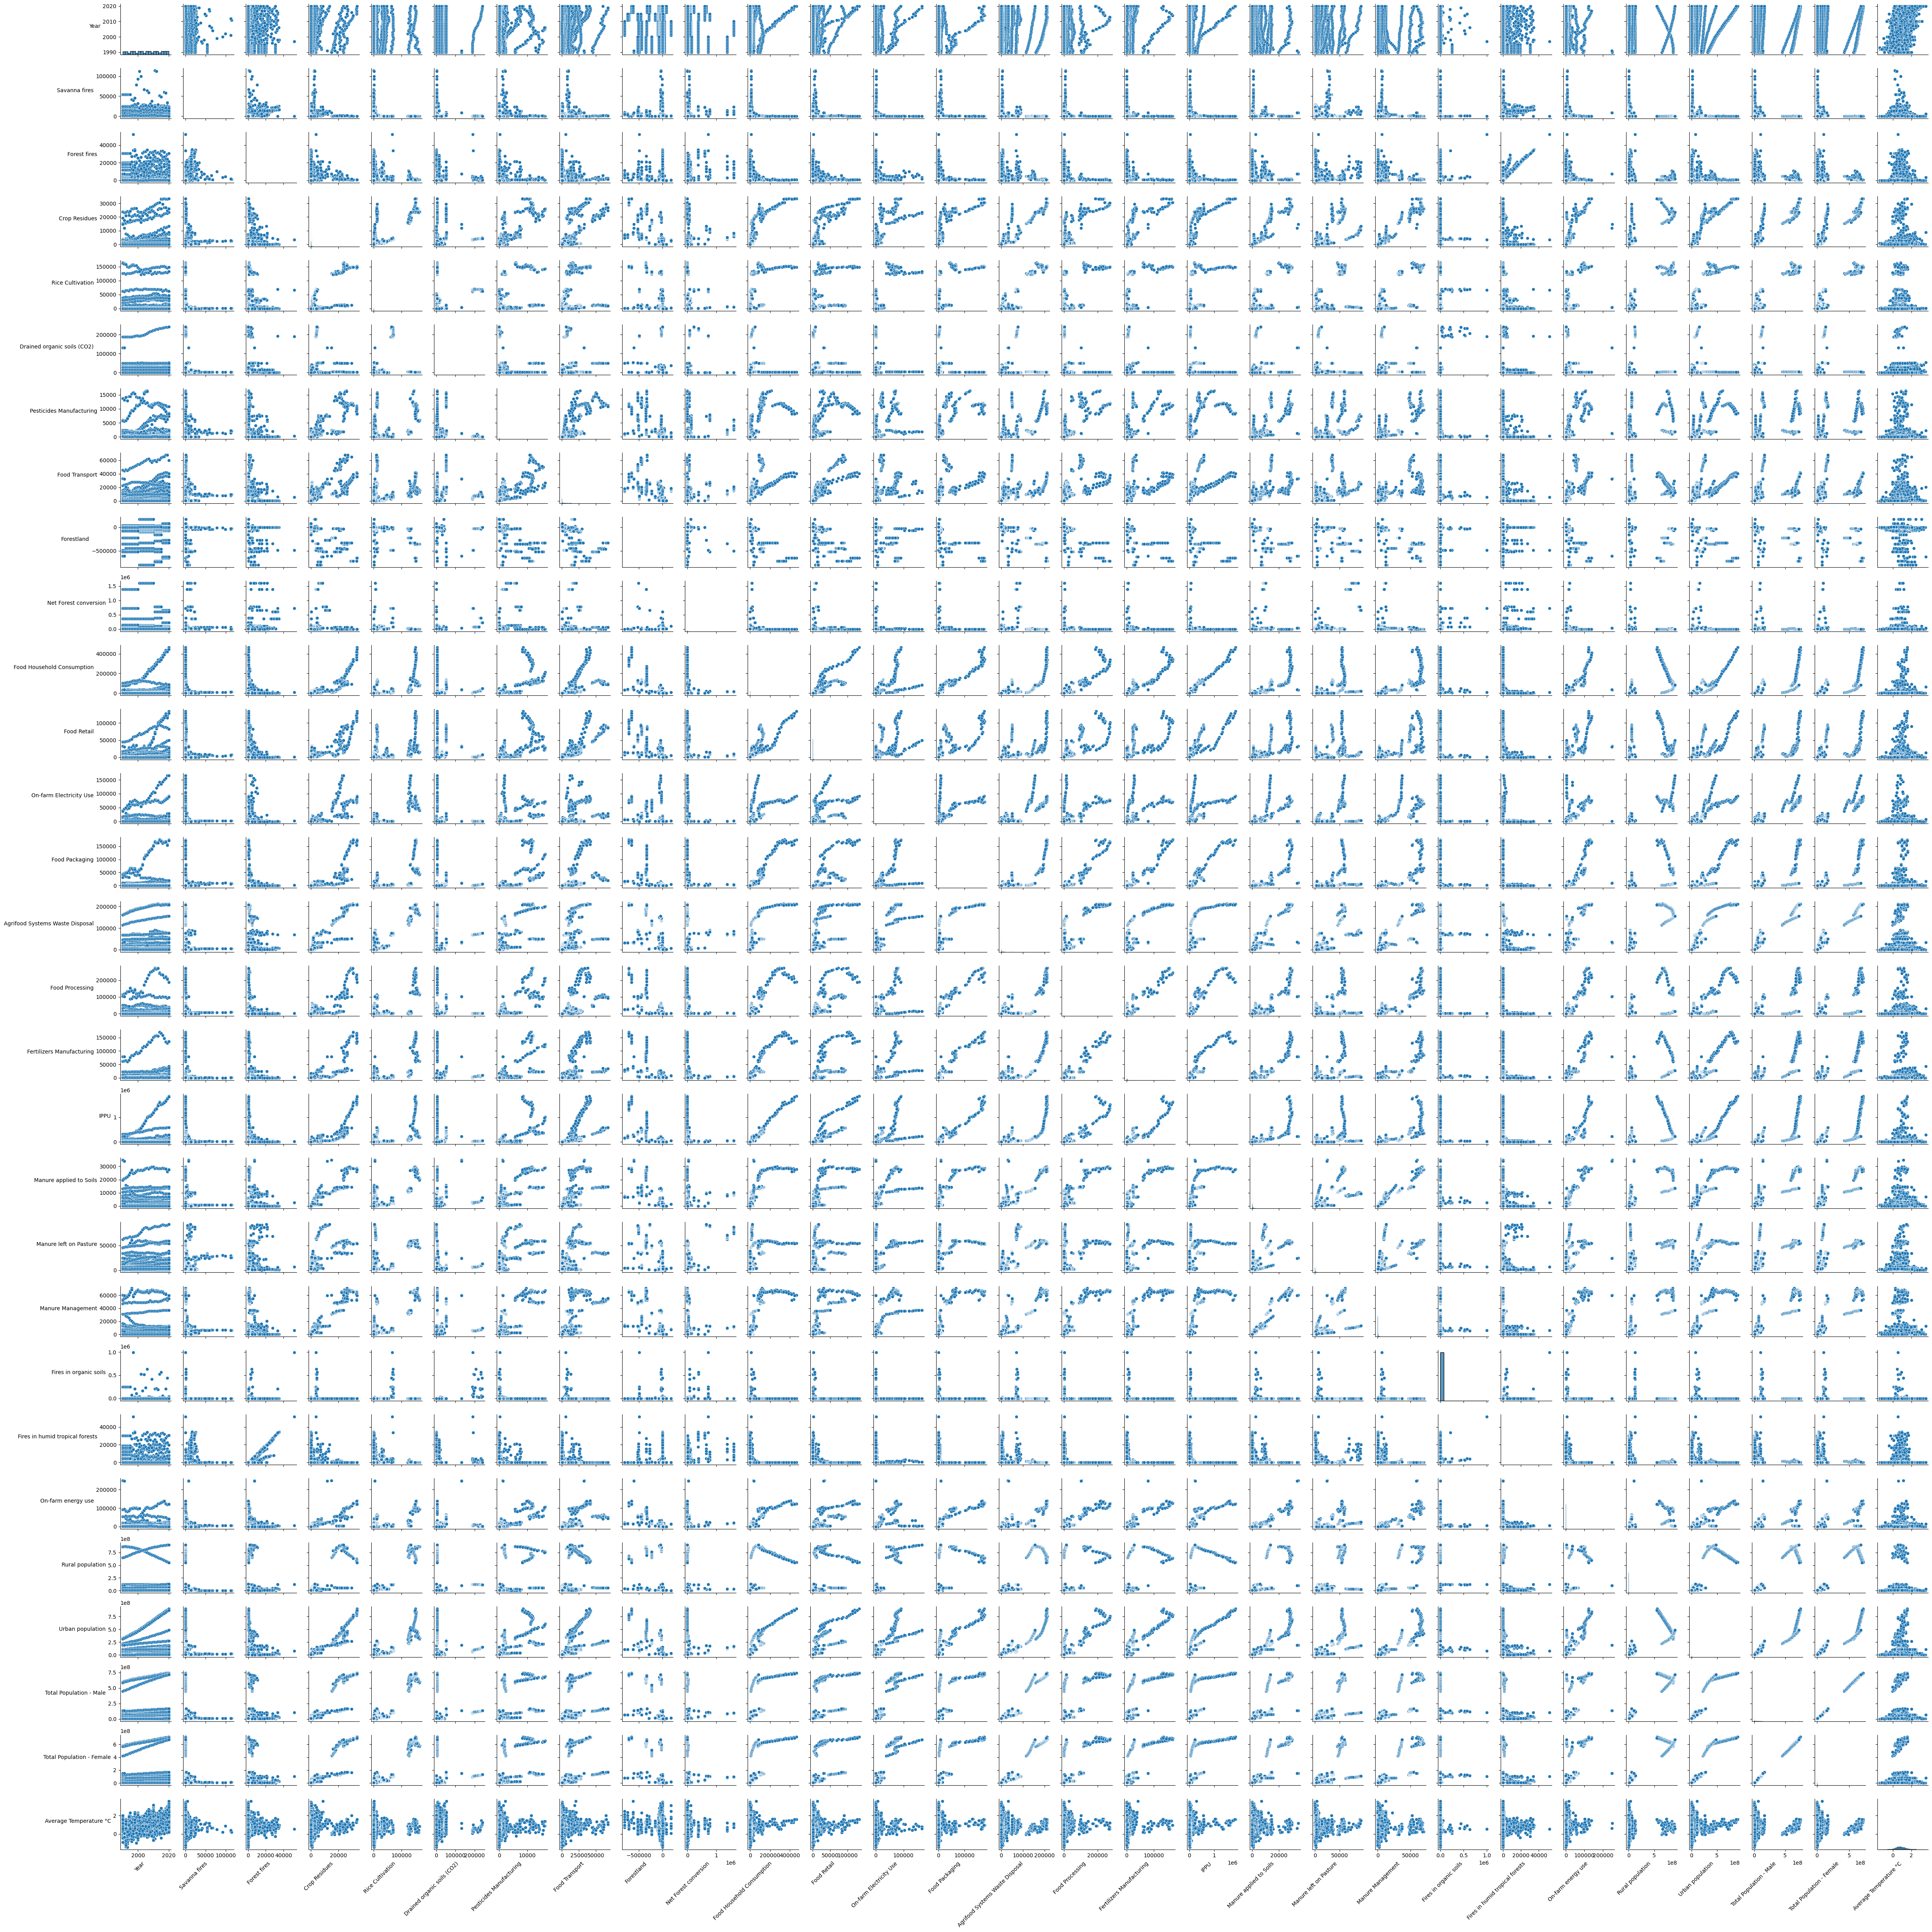

In [15]:
from seaborn import pairplot

g = pairplot(df.drop(columns=['total_emission', 'Area'], axis='columns'))
g.fig.set_size_inches(50,50)

for label in g.axes.flat:
    label.set_xlabel(label.get_xlabel(), rotation=45, ha='right', fontsize=10)
    label.set_ylabel(label.get_ylabel(), rotation=0, ha='right', fontsize=10)

# Adjust the layout to avoid overlap
g.fig.tight_layout()
g.fig.show()

## Correlation heatmap

<Figure size 1500x600 with 0 Axes>

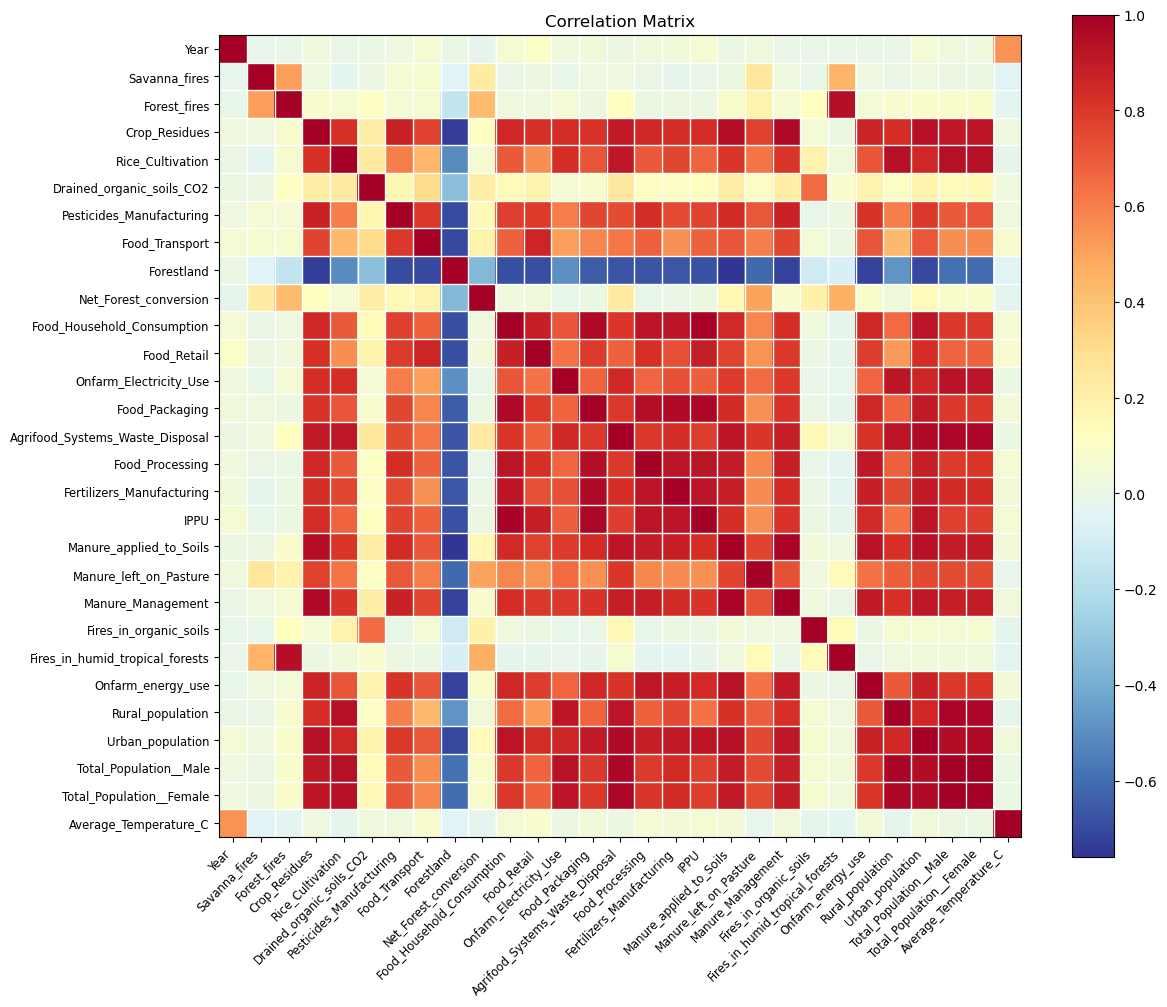

In [49]:
from statsmodels.graphics.correlation import plot_corr
corr = df.drop(columns=['total_emission', 'Area'], axis='columns').corr()

fig = plt.figure(figsize=(15, 6))
fig= plot_corr(corr,xnames=corr.columns)
fig.set_size_inches(15,15)

In [ ]:
def print_feature_importances(X, y, rf_model):
    """
    Function to print feature importances of a RandomForestRegressor model
    and output R-squared and Mean Squared Error (MSE) scores.

    Parameters:
    X : DataFrame
        The feature set (independent variables).
    y : Series
        The target variable (dependent variable).
    rf_model : RandomForestRegressor
        The trained RandomForest model.
    """
    # Get the feature importances
    feature_importances = rf_model.feature_importances_

    # Print the feature importances
    for feature, importance in zip(X.columns, feature_importances):
        print(f"Feature: {feature}, Importance: {importance}")

    # Make predictions on the test set
    y_pred = rf_model.predict(X)

    # Calculate R-squared and MSE
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse
print_feature_importances(X, y, rf_model)

## Multiple Linear Regression

In [ ]:
# multiple linear regression 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

X = df.drop(columns=['Area', 'total_emission'], axis=1)
y = df['total_emission']

x_scaler = StandardScaler()

lm = LinearRegression()



X_scaled = x_scaler.fit_transform(X)
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

X_standardise.describe().loc['std']    # values range [0:1]

#3. Ridge
X_train, X_test, y_train, y_test = train_test_split(X_standardised, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=True)
from sklearn.linear_model import Ridge
lm.fit(X_train, y_train)
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

test_lm = lm.predict(X_test)
test_ridge = ridge.predict(X_test)


r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'r2: {r2}')
print(f'rmse: {rmse}')

r2: 0.99939100230168
rmse: 6385.6987895730035


### Generate regression string

In the R programming language, fitting a machine learning model typically involves defining the relationship between variables using a formula-based interface. In this interface, a string of the form:

`y ~ X`

The string is read as "Regress *y* on $X$", indicating that we want to model the relationship between the response variable *y* and the predictor variable(s) $X$.

In Python's statsmodels library, the formula interface is used to define regression models. To fit a model using this approach, we need to construct a formula string. For example, a formula like y ~ $X_1$ + $X_2$ specifies a regression model where y is the dependent variable, and $X_1$ and $X_2$ are the predictors.

In [80]:
import statsmodels.formula.api as sm

target = 'total_emission'
independent_columns = ['Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_organic_soils_CO2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail',
       'Onfarm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
       'Fires_in_humid_tropical_forests', 'Onfarm_energy_use',
       'Rural_population', 'Urban_population', 'Total_Population__Male',
       'Total_Population__Female', 'total_emission', 'Average_Temperature_C']

formula_str = target+' ~ '+'+'.join(independent_columns)
formula_str


'total_emission ~ Year+Savanna_fires+Forest_fires+Crop_Residues+Rice_Cultivation+Drained_organic_soils_CO2+Pesticides_Manufacturing+Food_Transport+Forestland+Net_Forest_conversion+Food_Household_Consumption+Food_Retail+Onfarm_Electricity_Use+Food_Packaging+Agrifood_Systems_Waste_Disposal+Food_Processing+Fertilizers_Manufacturing+IPPU+Manure_applied_to_Soils+Manure_left_on_Pasture+Manure_Management+Fires_in_organic_soils+Fires_in_humid_tropical_forests+Onfarm_energy_use+Rural_population+Urban_population+Total_Population__Male+Total_Population__Female+total_emission+Average_Temperature_C'

In [81]:
# construct and fit model using OLS
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.282e+29
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:30:21   Log-Likelihood:             1.2064e+05
No. Observations:                6965   AIC:                        -2.412e+05
Df Residuals:                    6934   BIC:                        -2.410e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
# Get p-values for all features
p_values = fitted.pvalues  

# Filter for p-values < 0.05
significant_p_values = p_values[p_values < 0.05]
significant_p_values

In [82]:
significant_features = ['Savanna_fires', 'Rice_Cultivation', 'Drained_organic_soils_CO2', 'Food_Transport', 
                        'Forestland', 'Net_Forest_conversion', 'Food_Retail', 'Onfarm_Electricity_Use', 'Food_Packaging',
                        'Agrifood_Systems_Waste_Disposal', 'Food_Processing', 'Fertilizers_Manufacturing', 'IPPU', 
                        'Manure_left_on_Pasture', 'Fires_in_organic_soils', 'Fires_in_humid_tropical_forests', 
                        'Onfarm_energy_use', 'Rural_population', 'Urban_population', 'Total_Population__Male',
                        'Total_Population__Female']
formula_str = target+' ~ '+'+'.join(significant_features)
formula_str


'total_emission ~ Savanna_fires+Rice_Cultivation+Drained_organic_soils_CO2+Food_Transport+Forestland+Net_Forest_conversion+Food_Retail+Onfarm_Electricity_Use+Food_Packaging+Agrifood_Systems_Waste_Disposal+Food_Processing+Fertilizers_Manufacturing+IPPU+Manure_left_on_Pasture+Fires_in_organic_soils+Fires_in_humid_tropical_forests+Onfarm_energy_use+Rural_population+Urban_population+Total_Population__Male+Total_Population__Female'

In [83]:
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.752e+05
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:30:46   Log-Likelihood:                -72398.
No. Observations:                6965   AIC:                         1.448e+05
Df Residuals:                    6943   BIC:                         1.450e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## Homoscedasticity
  Check if residual variance remains constant along fitted values

### Residuals vs Fitted

To evaluate the presence of homoscedasticity or heteroscedasticity, we can plot the residuals against the fitted values (e.g., total emission). If the scatterplot displays a random and uniform spread of points, this indicates homoscedasticity, where the variance of residuals remains consistent across all levels of the predictor variable(s). In contrast, heteroscedasticity manifests as a systematic change in the spread of residuals with increasing or decreasing fitted values, often forming a cone-like pattern

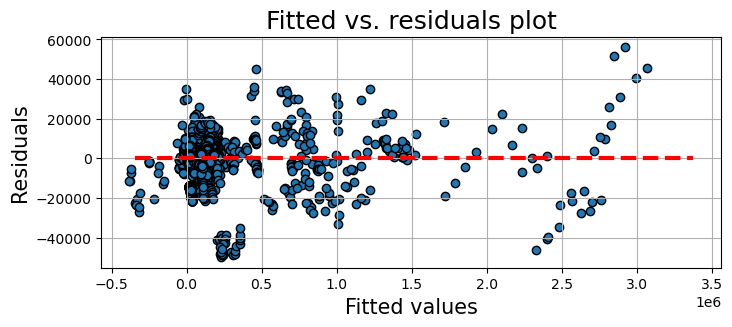

In [84]:

plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [ ]:


x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(np.array(X)[:,np.newaxis]) 
y_scaled = y_scaler.fit_transform(np.array(y)[:,np.newaxis]) 

# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=6)


In [1]:
1 + 1

2